<a href="https://colab.research.google.com/github/Foram003/Machine-Learning/blob/main/ML_ADABOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/creditcard_csv.csv')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
abc = AdaBoostClassifier()
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
ada = AdaBoostClassifier(estimator=lr)
ada.fit(X, y)
y_pred = ada.predict(X)
print("Accuracy:", ada.score(X, y))

Accuracy: 0.805


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
ada = AdaBoostClassifier(estimator=clf)

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy = {accuracy_score(y_test,y_pred)}")

Accuracy = 0.7966666666666666


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.83  0.805 0.755 0.83  0.745]
Average CV Score:  0.793
Number of CV Scores used in Average:  5


In [ ]:
lr = LogisticRegression(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(lr, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.855 0.74  0.775 0.81  0.81 ]
Average CV Score:  0.798
Number of CV Scores used in Average:  5


In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11]
for i in depth:

  clf = DecisionTreeClassifier(max_depth = i, random_state=42)

  abc = AdaBoostClassifier(estimator = clf)

  abc.fit(X_train, y_train)

  y_pred = abc.predict(X_test)

  print(f"\nMax Depth:{i}")
  print(f"Accuracy = {accuracy_score(y_test,y_pred)}")


Max Depth:1
Accuracy = 0.82

Max Depth:2
Accuracy = 0.85

Max Depth:3
Accuracy = 0.9066666666666666

Max Depth:4
Accuracy = 0.9033333333333333

Max Depth:5
Accuracy = 0.9333333333333333

Max Depth:6
Accuracy = 0.9533333333333334

Max Depth:7
Accuracy = 0.9533333333333334

Max Depth:8
Accuracy = 0.9533333333333334

Max Depth:9
Accuracy = 0.93

Max Depth:10
Accuracy = 0.9333333333333333

Max Depth:11
Accuracy = 0.9433333333333334


In [ ]:
l_rate = [0.1,0.5,0.01,0.05,0.2,0.3,0.02,0.03,0.4,0.6,0.04]

for i in l_rate:

  clf = DecisionTreeClassifier(random_state=42)

  abc = AdaBoostClassifier(estimator = clf, learning_rate = i)

  abc.fit(X_train, y_train)

  y_pred = abc.predict(X_test)

  print(f"\nLearning Rate:{i}")
  print(f"Accuracy = {accuracy_score(y_test,y_pred)}")


Learning Rate:0.1
Accuracy = 0.7833333333333333

Learning Rate:0.5
Accuracy = 0.7833333333333333

Learning Rate:0.01
Accuracy = 0.7733333333333333

Learning Rate:0.05
Accuracy = 0.7733333333333333

Learning Rate:0.2
Accuracy = 0.7933333333333333

Learning Rate:0.3
Accuracy = 0.78

Learning Rate:0.02
Accuracy = 0.7733333333333333

Learning Rate:0.03
Accuracy = 0.79

Learning Rate:0.4
Accuracy = 0.7866666666666666

Learning Rate:0.6
Accuracy = 0.7766666666666666

Learning Rate:0.04
Accuracy = 0.7666666666666667


<ipython-input-33-c7e838216440>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(max_depths)


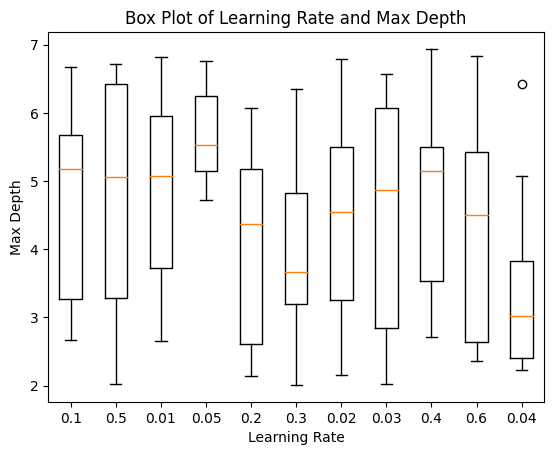

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
learning_rates = [0.1,0.5,0.01,0.05,0.2,0.3,0.02,0.03,0.4,0.6,0.04]

max_depths = [1,2,3,4,5,6,7,8,9,10,11]

data = np.random.rand(len(max_depths), len(learning_rates))

fig, ax = plt.subplots()

ax.boxplot(data)

ax.set_xlabel('Learning Rate')

ax.set_ylabel('Max Depth')

ax.set_title('Box Plot of Learning Rate and Max Depth')

ax.set_xticklabels(learning_rates)

ax.set_yticklabels(max_depths)

plt.show()


<ipython-input-30-a77521b52dda>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(max_depths)


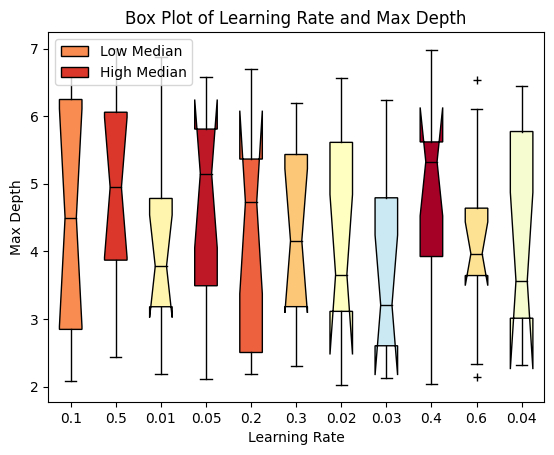

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

learning_rates = [0.1,0.5,0.01,0.05,0.2,0.3,0.02,0.03,0.4,0.6,0.04]
max_depths = [1,2,3,4,5,6,7,8,9,10,11]

# generate random data
data = np.random.rand(len(max_depths), len(learning_rates))

# create colormap based on median values
median_values = np.median(data, axis=0)
colors = plt.cm.RdYlBu_r(median_values / np.max(median_values))

# create figure and axes
fig, ax = plt.subplots()

# create box plot with colored boxes
bp = ax.boxplot(data, patch_artist=True, notch=True, sym='+', vert=True, whis=1.5)

# set box colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# set median line color
for median in bp['medians']:
    median.set_color('black')

# set x and y labels and titles
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Max Depth')
ax.set_title('Box Plot of Learning Rate and Max Depth')

# set x and y tick labels
ax.set_xticklabels(learning_rates)
ax.set_yticklabels(max_depths)

# add legend
plt.legend([bp["boxes"][0], bp["boxes"][1]], ['Low Median', 'High Median'], loc='upper left')

# show the plot
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def get_models():
    models = []
    for max_depth in range(1, 12):
        dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=101)
        ada = AdaBoostClassifier(estimator=dtc, random_state=101)
        models.append(ada)
    return models


def evaluate_model(model, X, y):
    kfold = KFold(n_splits=11, shuffle=True, random_state=101)
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f"Accuracy: {scores.mean():.3f}")


models = get_models()
for model in models:
    evaluate_model(model, X, y)

Accuracy: 0.802
Accuracy: 0.857
Accuracy: 0.880
Accuracy: 0.885
Accuracy: 0.920
Accuracy: 0.922
Accuracy: 0.921
Accuracy: 0.922
Accuracy: 0.935
Accuracy: 0.921
Accuracy: 0.895


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
def get_models():
  models = []
  for lr in [0.1,0.5,0.01,0.05,0.2,0.3,0.02,0.03,0.4,0.6,0.04]:
    ada = AdaBoostClassifier(learning_rate=lr, random_state=42)
    models.append(ada)
  return models




def evaluate_model(model, X, y):
  kfold = KFold(n_splits=10, shuffle=True, random_state=101)
  scores = cross_val_score(model, X, y, cv=kfold)
  print(f"Learning rate: {model.learning_rate:.2f}, Accuracy: {scores.mean():.3f}")

models = get_models()

for model in models:
  evaluate_model(model, X, y)

Learning rate: 0.10, Accuracy: 0.766
Learning rate: 0.50, Accuracy: 0.796
Learning rate: 0.01, Accuracy: 0.677
Learning rate: 0.05, Accuracy: 0.738
Learning rate: 0.20, Accuracy: 0.787
Learning rate: 0.30, Accuracy: 0.797
Learning rate: 0.02, Accuracy: 0.712
Learning rate: 0.03, Accuracy: 0.724
Learning rate: 0.40, Accuracy: 0.786
Learning rate: 0.60, Accuracy: 0.789
Learning rate: 0.04, Accuracy: 0.737


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
param_grid = {

'n_estimators': [10, 50, 100, 500],

'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]

}
ada = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 1.0, 'n_estimators': 500}
Best score: 0.8099999999999999


In [ ]:
import numpy as np


cv_results = grid_search.cv_results_


scores = cv_results['mean_test_score']


mean_score = np.mean(scores)
std_score = np.std(scores)


print("Mean score:", mean_score)
print("Standard deviation of score:", std_score)

Mean score: 0.7078571428571429
Standard deviation of score: 0.0597366670291799
